# Assignment Predictive Modelling Using Python

BACKGROUND

The data for modeling contains information on Selling price of each house in million Rs. It also contains Carpet area in square feet, Distance from nearest metro station and Number of schools within 2 km distance. The data has 198 rows and 5 columns.

Notes:

Dependent Variable:
- Houses selling price

Indepented variables:
- Carpet area in square feet
- Distance from nearest metro station
- Number of schools within 2 km distance


# Question 1 : Import House Price Data. Check the structure of the data


### Import House Price Data. Check the structure of the data

This step involves loading the dataset from a CSV file and displaying the first few rows to understand the structure of the data.

In [ ]:
import pandas as pd

# Import data
data = pd.read_csv("/content/House Price Data.csv")

# Display first few rows of data
data.head()

,Houseid,Price,Area,Distance,Schools
0,1,24.74,1036,3.22,2
1,2,20.15,1030,4.33,3
2,3,25.98,1046,1.94,3
3,4,20.10,950,2.45,2
4,5,23.03,952,2.47,2


In [ ]:
# Remove the column named "Houseid" from the dataset data
data.drop(columns=['Houseid'], inplace=True)
data.head()

,Price,Area,Distance,Schools
0,24.74,1036,3.22,2
1,20.15,1030,4.33,3
2,25.98,1046,1.94,3
3,20.10,950,2.45,2
4,23.03,952,2.47,2


In [ ]:
# Check the structure of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     198 non-null    float64
 1   Area      198 non-null    int64  
 2   Distance  198 non-null    float64
 3   Schools   198 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 6.3 KB


In [ ]:
data.describe()

,Price,Area,Distance,Schools
count,198.000000,198.000000,198.000000,198.000000
mean,25.390455,1040.393939,2.335152,2.494949
std,4.854549,98.348786,0.991971,0.540234
min,16.300000,825.000000,0.100000,1.000000
25%,21.532500,967.000000,1.930000,2.000000
50%,25.305000,1033.000000,2.260000,3.000000
75%,28.670000,1094.000000,3.040000,3.000000
max,35.490000,1345.000000,4.330000,3.000000


In [ ]:
#!pip install ydata-profiling
from ydata_profiling import ProfileReport

profile = ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Correlation Matrix using Heatmap

A heatmap of the correlation matrix helps visualize the relationships between variables, with color gradients representing the strength of the correlations.

<Axes: >

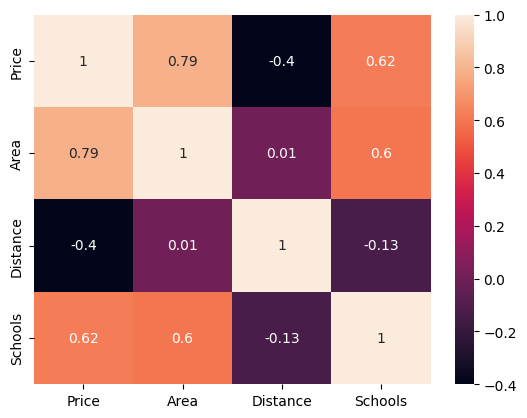

In [ ]:
import seaborn as sns
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

Observations:
- Price and Area: There is a strong positive correlation. As the area of the house increass, the price of the house tends to increase as well.
- Price and Distance: Moderate negative correlation. As the distance from the metro station increases, the price of the house tends to decrease.
- Price and Schools: There is a positive correlation. Houses close more schools tend to have higher prices.

# Question 2 : Split the data into Training (80%) and Testing (20%) data sets

### Split the data into Training (80%) and Testing (20%) data sets

Splitting the data into training and testing sets allows us to build and evaluate the model on different subsets of the data, which helps in assessing the model's performance.

In [ ]:
# Load necessary libraries
from sklearn.model_selection import train_test_split

# Split data
# 80% of the data is selected for the training set
X = data.drop(columns=['Price'])
Y = data['Price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=123)

# Question 3 : Build a regression model on training data to estimate selling price of a House.

### Build a regression model on training data to estimate selling price of a House.

This step involves fitting a linear regression model to the training data to establish the relationship between the dependent variable and the independent variables

In [ ]:
# Build model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
model.coef_

array([ 0.03490139, -1.81595457,  1.29578575])

#Question 4 : List down significant variables and interpret their regression coefficients

### List down significant variables and interpret their regression coefficients

The summary of the linear regression model includes parameter estimates (coefficients), R-squared value, p-values, and other statistics that help evaluate the model

In [ ]:
import statsmodels.api as sm

# Define your formula
formula = 'Price ~ ' + ' + '.join(data.columns.drop('Price'))

# Fit the linear regression model
data_model = sm.OLS.from_formula(formula, data=data).fit()

# Why not using this instead???
#data_model = sm.OLS(Y_train,X_train).fit()

# Print the model summary
print(data_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     249.0
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           3.03e-66
Time:                        22:36:39   Log-Likelihood:                -436.96
No. Observations:                 198   AIC:                             881.9
Df Residuals:                     194   BIC:                             895.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.5423      1.744     -5.472      0.0

Observations:
- All variables are significant as p values are smaller than 0.05
-  The coefficients for the predictor variables suggest their respective impact on the price. The variables Area and Schools have positive effects, while Distance has a negative effect.


# Question 5 : What is the R2 and adjusted R2 of the model? Give interpretation



### What is the R2 and adjusted R2 of the model? Give interpretation


- The model’s R² value is 0.794, indicating that approximately 79% of the variability in Price is explained by the model.

R² values can sometimes be misleading as adding more predictors to a model can artificially inflate the R² value, even if the predictors are irrelevant.

- The Adjusted R-squared is 0.791. Adjusted R-squared adjusts the R² statistic based on the number of predictors in the model.
As we can see they are comparable.

Unlike R², the Adjusted R² can decrease if predictors do not improve the model beyond what would be expected by chance.

It is always lower or equal to R², and it provides a more honest representation of the model fit when dealing with multiple predictors.

As we can see they are comparable.

# Question 6 : Is there a multicollinearity problem? If yes, do the necessary steps to remove it




The Variance Inflation Factor (VIF) measures the extent of multicollinearity in the regression model. High VIF values indicate multicollinearity issues.

In [ ]:
import patsy
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create the design matrix
y, X = patsy.dmatrices(formula, data, return_type='dataframe')

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF DataFrame
print(vif_data)

    Variable         VIF
0  Intercept  122.035682
1       Area    1.580103
2   Distance    1.027805
3    Schools    1.606248


Observations:
- There is no multicollinearity problem as all VIF’s are less than 5

# Question 7 : Are there any influential observations in the data?

Influential observations in a dataset is an important step in regression analysis, as these points can disproportionately affect the results of the model.

In [ ]:
from statsmodels.stats.outliers_influence import OLSInfluence

# Calculate influence measures
influence = OLSInfluence(data_model)

# Display summary of influence measures
print(influence.summary_frame())

     dfb_Intercept  dfb_Area  dfb_Distance  dfb_Schools   cooks_d  \
0        -0.012524  0.032513      0.042302    -0.057540  0.002382   
1        -0.002247  0.064382     -0.136021    -0.096864  0.006984   
2        -0.009650  0.019752      0.007083    -0.035154  0.000621   
3        -0.036633  0.019434     -0.001978     0.018502  0.000902   
4         0.044085 -0.022878      0.003375    -0.023569  0.001371   
..             ...       ...           ...          ...       ...   
193      -0.037255  0.059471      0.000519    -0.074122  0.002192   
194       0.005531  0.012382     -0.009907    -0.029531  0.000452   
195       0.004033 -0.017599      0.021347     0.026987  0.000352   
196      -0.295521  0.113213      0.355480     0.118927  0.054992   
197       0.374445 -0.396703      0.059808     0.150895  0.046156   

     standard_resid  hat_diag  dffits_internal  student_resid    dffits  
0          0.820287  0.013962         0.097611       0.819593  0.097528  
1         -0.833577  0.

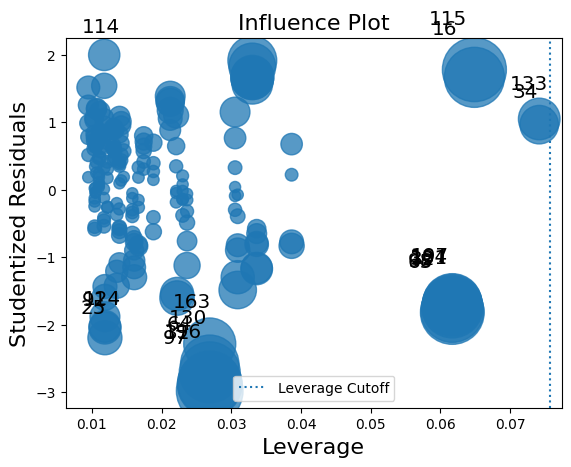

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt
influence_plot(data_model)

n=data.shape[0]
k=data.shape[1]
leverage_cutoff =3*(k+1)/n
plt.axvline(x=leverage_cutoff,linestyle=':',label='Leverage Cutoff')
plt.legend()
plt.show()

Observations:
- There are influential as indicated by the large circle sizes. They have a substantial effect on the regression model.

# Question 8 : Can we assume that errors follow ‘Normal’ distribution?

The histogram and Q-Q plot help check if the residuals follow a normal distribution, which is an assumption of linear regression.

If the residuals follow a normal distribution, it validates one of the regression assumptions, supporting the reliability of confidence intervals and hypothesis tests.

If the data are truly sampled from a normal distribution the Q-Q plot will be linear

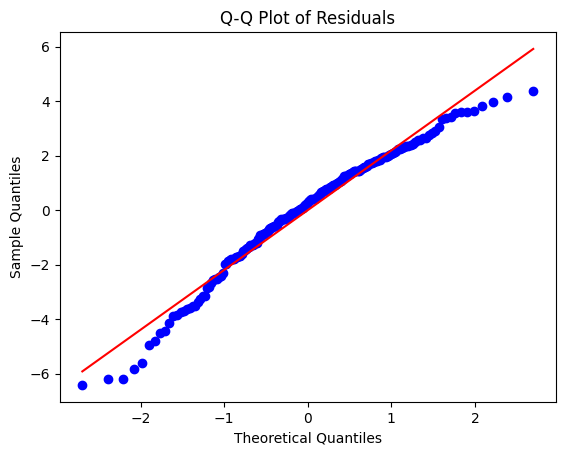

In [ ]:
# Add fitted values and residuals to the DataFrame
data['fit'] = data_model.fittedvalues
data['resi'] = data_model.resid


import scipy.stats as stats
import matplotlib.pyplot as plt

# Assuming 'data' is a pandas DataFrame
# Assuming 'data_model1' is the fitted linear regression model

# Q-Q plot of residuals
stats.probplot(data['resi'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

Observation: The points do not seems to sit on a line

In [ ]:
# Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(data['resi'])
print("Shapiro-Wilk test p-value:", shapiro_test.pvalue)

Shapiro-Wilk test p-value: 0.00035177782410755754


The Shapiro-Wilk test, commonly referred to as the Shapiro test, is a statistical test used to assess the normality of a dataset.

the p-value is less than 0.05, the null hypothesis is rejected, indicating that the data do not follow a normal distribution.

# Question 9 : Is there a Heteroscedasticity problem? Check using residual vs. predictor plots.


We want to diagnose the fit of the model by visualizing the distribution of residuals (errors).

Ideally, residuals should be randomly scattered around zero.

If the residuals are randomly scattered around zero, it suggests that the model’s assumptions are likely satisfied and the model provides a good fit.

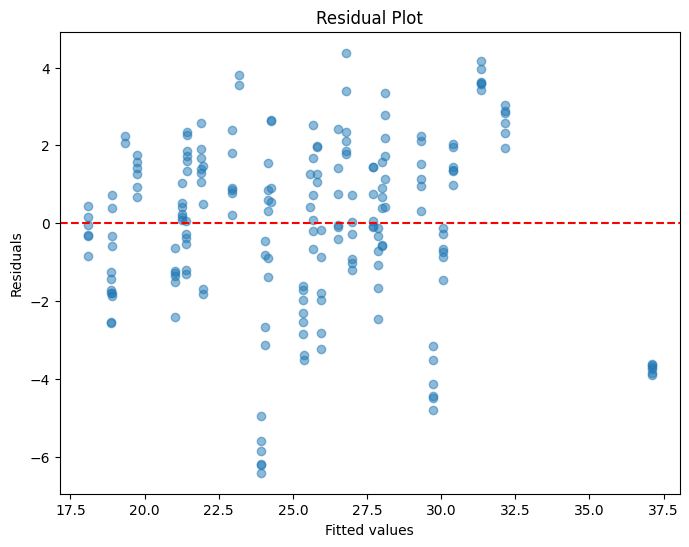

In [ ]:
# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(data['fit'], data['resi'], alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Observation:
- Residuals in the model are randomly distributed indicating NO presence of Heteroscedasticity

# Question 10: Calculate the RMSE for the Training and Testing data. Multiple Linear Regression

The Root Mean Squared Error (RMSE) measures the average magnitude of the errors between predicted and actual values, providing an indication of model accuracy.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print('RMSE is {}'.format(rmse))

RMSE is 2.231247572716529


In [ ]:
print('R2 score is {}'.format(r2))

R2 score is 0.7951398945293064


Validating the model on the test set using RMSE helps assess its performance on unseen data.

In [ ]:
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('RMSE is {}'.format(rmse))

RMSE is 2.0871896683373277


In [ ]:
print('R2 score is {}'.format(r2))

R2 score is 0.7768590343068583


Obseravation:The similarity in RMSE between the test and train data suggests that the regression model generalizes reasonably well, with consistent prediction accuracy on both datasets. This implies that the model is stable and not overfitting to the training data.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

folds = KFold(n_splits = 4, shuffle = True, random_state = 100)
scores = cross_val_score(model, X, Y, scoring='r2', cv=folds)


print("Mean 4-Fold R Squared: {}".format(np.mean(scores)))

Mean 4-Fold R Squared: 0.7846288866074256


In [ ]:
cv_rmse_scores= cross_val_score(model, X, Y, cv=folds, scoring='neg_mean_squared_error')
np.sqrt(-(np.mean(cv_rmse_scores)))

2.2458717589181005

Comment: RMSE and R squared values using K-fold validation are similar to overall RMSE and R squared
values